## Central Limit Theorem Exercise

In [1]:
import pandas as pd
import numpy as np
# package with hypothesis tests
import scipy.stats as st
import matplotlib.pyplot as plt

<ipython-input-7-b822325ae7e0>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


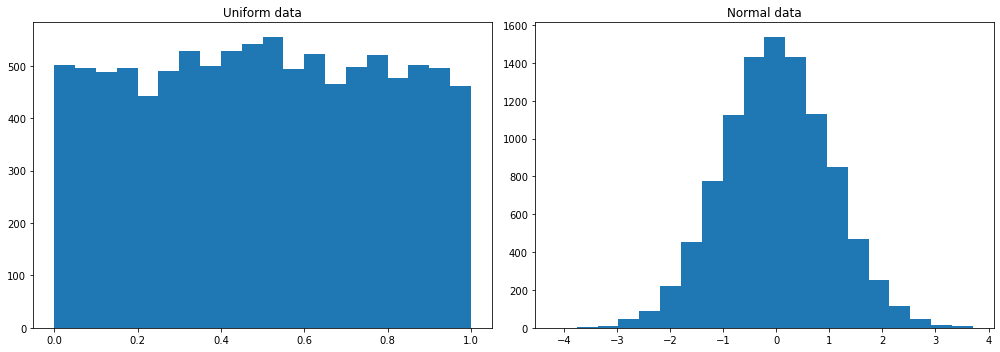

In [7]:
#
uniform = np.random.rand(10000)
normal = np.random.randn(10000)

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(uniform, bins=20)
ax1.set_title('Uniform data')
ax2.hist(normal, bins=20)
ax2.set_title('Normal data')
fig.tight_layout()
fig.show();

In [3]:
help(ax1.hist)

Help on method hist in module matplotlib.axes._axes:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *ran

### CLT - simulation

### How many samples do we need to take, so that the distribution of means for these samples will pass the shapiro-wilk test for normality if the population is from a Uniform or a Normal distribution?

+ Assume the population has 10,000 observation.
+ Assume sample size is always 50.

We will be suprised to see how fast the test passes for both distributions.

In [22]:
help(st.shapiro)

Help on function shapiro in module scipy.stats.morestats:

shapiro(x)
    Perform the Shapiro-Wilk test for normality.
    
    The Shapiro-Wilk test tests the null hypothesis that the
    data was drawn from a normal distribution.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    
    Returns
    -------
    statistic : float
        The test statistic.
    p-value : float
        The p-value for the hypothesis test.
    
    See Also
    --------
    anderson : The Anderson-Darling test for normality
    kstest : The Kolmogorov-Smirnov test for goodness of fit.
    
    Notes
    -----
    The algorithm used is described in [4]_ but censoring parameters as
    described are not implemented. For N > 5000 the W test statistic is accurate
    but the p-value may not be.
    
    The chance of rejecting the null hypothesis when it is true is close to 5%
    regardless of sample size.
    
    References
    ----------
    .. [1] https://www.itl.nist.

In [57]:
# Shapiro test requires at least 3 samples to run
uniform_means = []
for i in range(3):
    uniform_means.append(np.random.choice(uniform, size=50).mean())

# Check the p value of the shapiro test for different number of sample means with 50 observations each
print("p     n")
for i in range(40):
    print(round(st.shapiro(uniform_means).pvalue, 3), len(uniform_means))
    uniform_means.append(np.random.choice(uniform, size=50).mean())

# Checking the shapiro test using over 1000 sample means
for i in range(1000):
    uniform_means.append(np.random.choice(uniform, size=50).mean())

print()
print("shapiro test with over 1000 means")
print(round(st.shapiro(uniform_means).pvalue, 3), len(uniform_means))

p     n
0.582 3
0.508 4
0.398 5
0.637 6
0.323 7
0.429 8
0.465 9
0.423 10
0.34 11
0.765 12
0.872 13
0.898 14
0.776 15
0.579 16
0.364 17
0.201 18
0.252 19
0.133 20
0.074 21
0.115 22
0.075 23
0.058 24
0.092 25
0.1 26
0.106 27
0.135 28
0.106 29
0.083 30
0.124 31
0.174 32
0.115 33
0.16 34
0.117 35
0.153 36
0.099 37
0.106 38
0.07 39
0.043 40
0.127 41
0.12 42

shapiro test with over 1000 means
0.956 1043


In [63]:
# Shapiro test requires at least 3 samples to run
normal_means = []
for i in range(3):
    normal_means.append(np.random.choice(normal, size=50).mean())

# Check the p value of the shapiro test for different number of sample means with 50 observations each
print("p     n")
for i in range(40):
    print(round(st.shapiro(normal_means).pvalue, 3), len(normal_means))
    normal_means.append(np.random.choice(normal, size=50).mean())

# Checking the shapiro test using over 1000 sample means
for i in range(1000):
    normal_means.append(np.random.choice(normal, size=50).mean())

print()
print("shapiro test with over 1000 means")
print(round(st.shapiro(normal_means).pvalue, 3), len(normal_means))

p     n
0.167 3
0.441 4
0.308 5
0.469 6
0.227 7
0.118 8
0.162 9
0.092 10
0.18 11
0.338 12
0.165 13
0.089 14
0.061 15
0.074 16
0.044 17
0.036 18
0.021 19
0.03 20
0.02 21
0.012 22
0.015 23
0.028 24
0.023 25
0.081 26
0.069 27
0.05 28
0.132 29
0.231 30
0.177 31
0.141 32
0.105 33
0.077 34
0.056 35
0.041 36
0.029 37
0.06 38
0.051 39
0.083 40
0.145 41
0.163 42

shapiro test with over 1000 means
0.189 1043


Seems werid to me how erratic the p value of the shapiro test is. Although almost always over 0.05, when it does dip below 0.05, it's around the 10 - 20 sample mean mark. After 1000 sample means it can be anywhere from 0.15 to 0.9